In [4]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#import inital libs to import CSV value into data frame
import pandas as pd
import numpy as np

In [6]:
#importing CSV file
bike_rental_data = pd.read_csv('day.csv')

In [7]:
#have a look on data set
bike_rental_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bike_rental_data.shape

(730, 16)

In [9]:
bike_rental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### So, there is no missing values in data set

In [10]:
bike_rental_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Visualizing the data set

In [11]:
#import required libraries
import matplotlib.pyplot as plt 
import seaborn as sns

<Axes: >

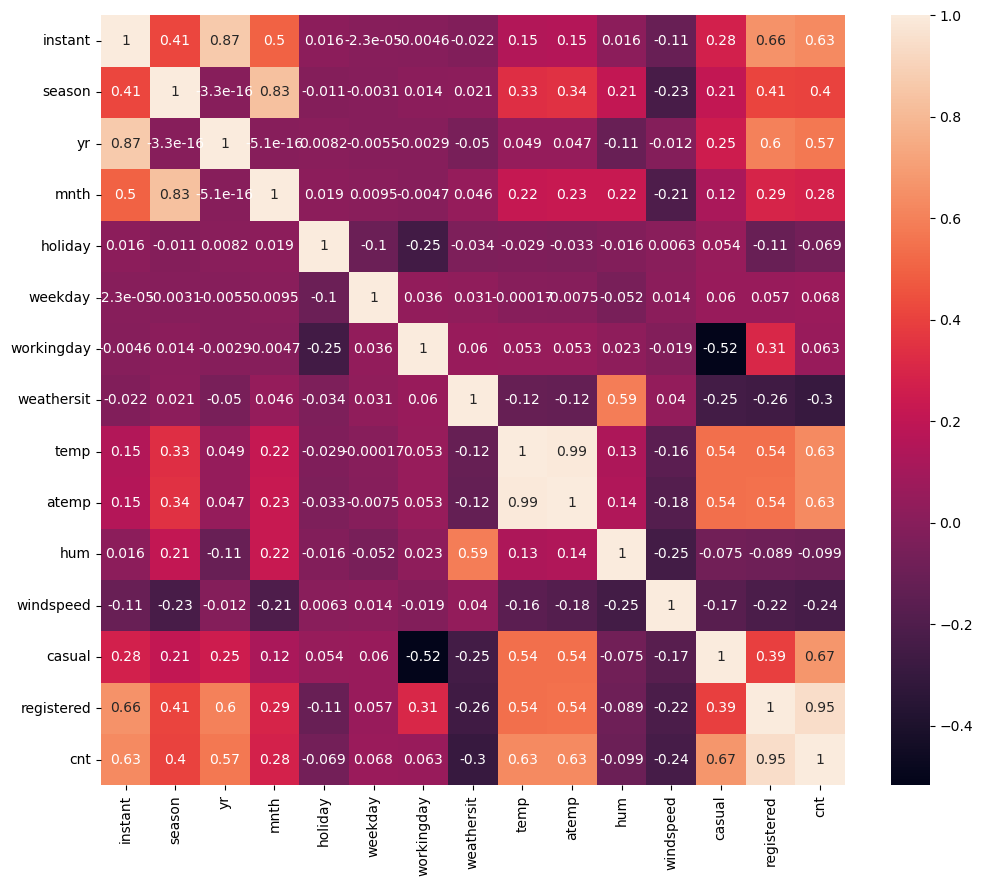

In [12]:
#lets firt draw co relation heatmap among all variables.
plt.figure(figsize=(12, 10))
sns.heatmap(bike_rental_data.corr(), annot=True)

In [13]:
#check corelation of all variables with target variable.
correlations = bike_rental_data.corr()['cnt']
print(correlations)

instant       0.629896
season        0.404584
yr            0.569728
mnth          0.278191
holiday      -0.068764
weekday       0.067534
workingday    0.062542
weathersit   -0.295929
temp          0.627044
atemp         0.630685
hum          -0.098543
windspeed    -0.235132
casual        0.672123
registered    0.945411
cnt           1.000000
Name: cnt, dtype: float64


<Figure size 1000x50000 with 0 Axes>

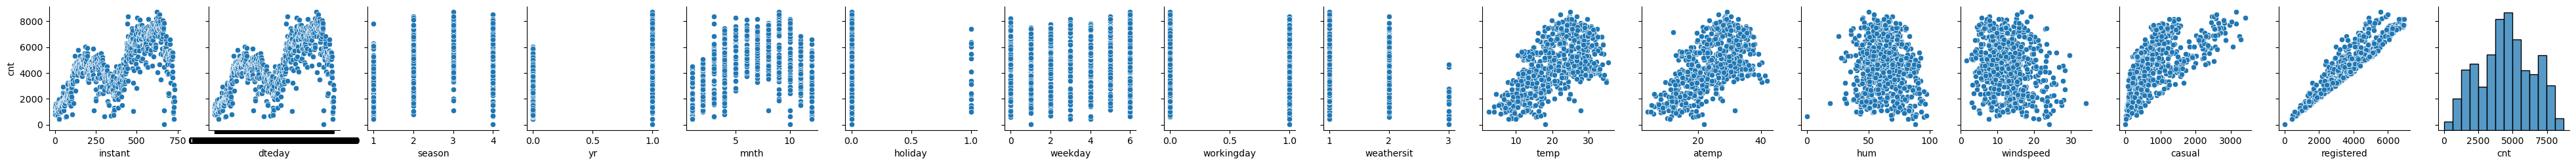

In [14]:
plt.figure(figsize=(10, 500))
sns.pairplot(bike_rental_data, x_vars=bike_rental_data, y_vars='cnt', kind='scatter')
plt.show()

##### clearly atemp have linear relation with cnt as compare to other variables. We will review this at time of model building as well.

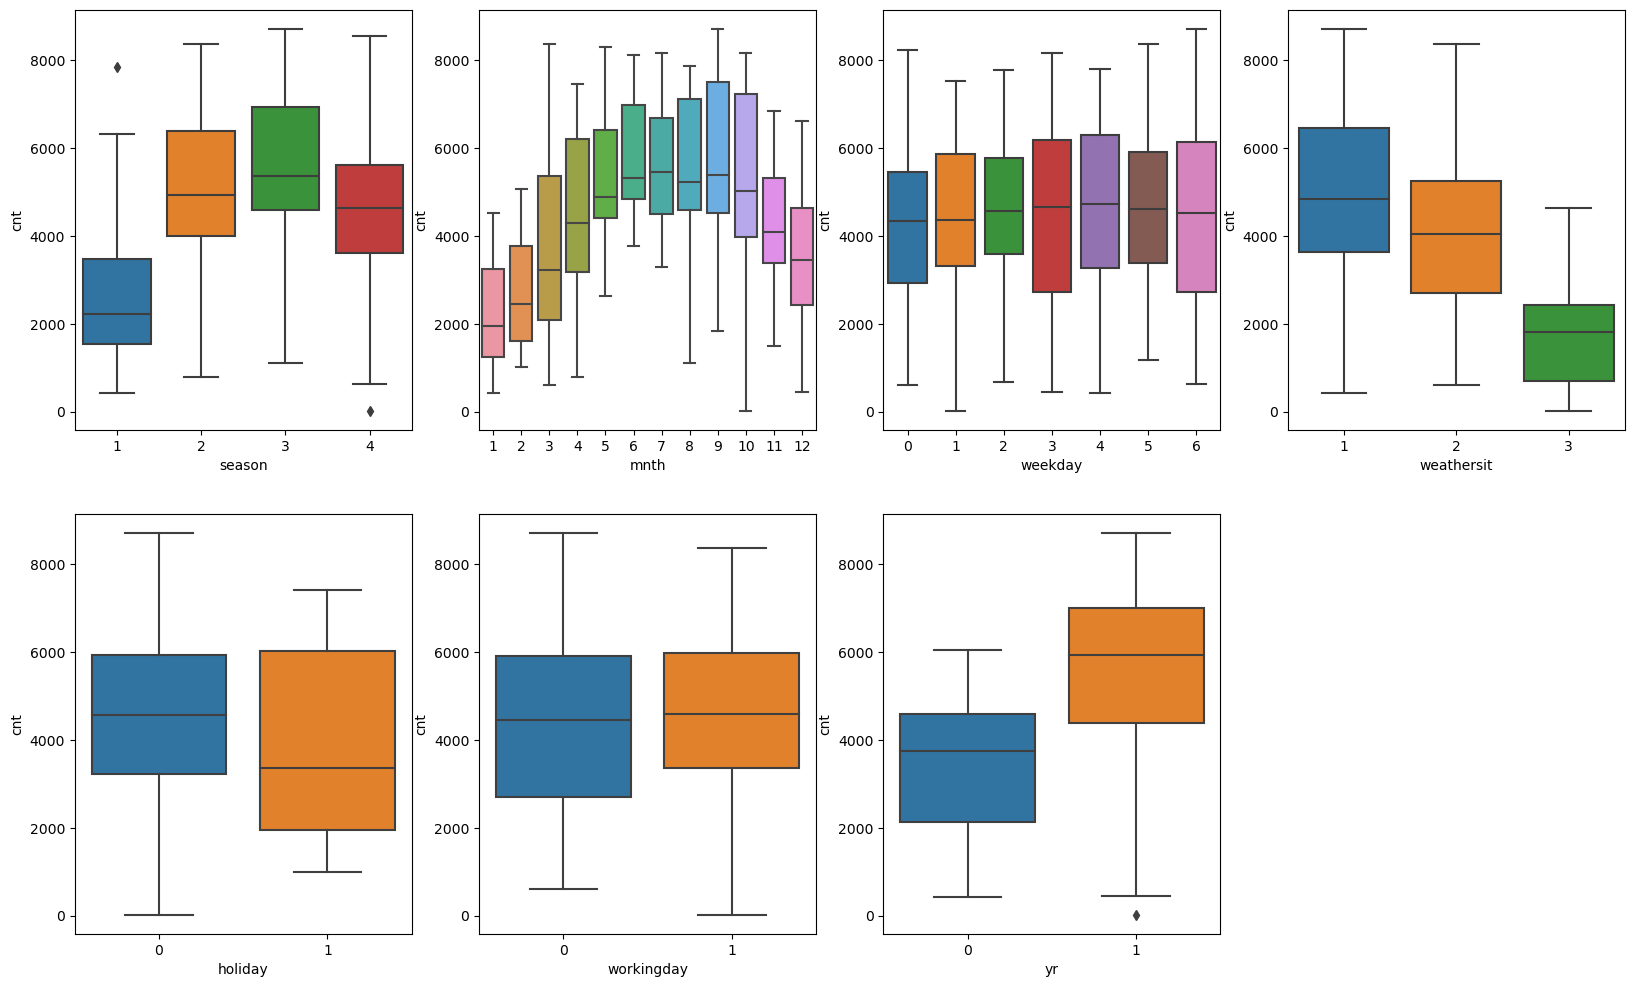

In [15]:
#review the categorial variables with target variable.

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_rental_data)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_rental_data)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_rental_data)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_rental_data)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_rental_data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_rental_data)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_rental_data)
plt.show()

## Observations from visualizations :
 - atemp have strong linear relation with target variable
 - year 2019 has more sales than 2018
 - LIGHT_PRECEPTION, SPRING having 0 have more sales than 1
 - SUMMER season have more sales
 - Working day have more sales than holiday.



### Data Preparation

In [16]:
#since temp and atemp are almost co related, we can drop one of the them from data set. lets drop temp
#also we can drop instant and dteday as they have unique value for all rows and we already have year and month column as well.
bike_rental_data.drop(['temp','instant','dteday'], axis = 1, inplace = True)

In [17]:
# To create dummy variables out of category variables in future, its better to convert them into meaningful strings from integers. 
# Note we wont do it if category variable is binary that is it have 1 and 0 as possible values. 
# We will do it for category variables having more than  2 values
# so, lets convert weathersit into labels from integer as below
#    CLEAR = 1
#    MISTY = 2
#    LIGHT_PRECIPITATION = 3
#    HEAVY_PRECIPITATION = 4

weather_mapping = {
    1: 'CLEAR',
    2: 'MISTY',
    3: 'LIGHT_PRECIPITATION',
    4: 'HEAVY_PRECIPITATION'
}

bike_rental_data.weathersit = bike_rental_data.weathersit.map(weather_mapping)


In [18]:
bike_rental_data.weathersit.value_counts()

CLEAR                  463
MISTY                  246
LIGHT_PRECIPITATION     21
Name: weathersit, dtype: int64

In [19]:
#lets create dummy variables now for weathersit, it has 3 values - so we will need only 2 dummy variables.
dummies = pd.get_dummies(bike_rental_data.weathersit, drop_first = True)
bike_rental_data = pd.concat([bike_rental_data, dummies], axis = 1)


In [20]:
bike_rental_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt,LIGHT_PRECIPITATION,MISTY
0,1,0,1,0,6,0,MISTY,18.18125,80.5833,10.749882,331,654,985,0,1
1,1,0,1,0,0,0,MISTY,17.68695,69.6087,16.652113,131,670,801,0,1
2,1,0,1,0,1,1,CLEAR,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,1,0,1,0,2,1,CLEAR,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,1,0,1,0,3,1,CLEAR,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [21]:
#now we can drop weathersit column from data set
bike_rental_data.drop(['weathersit'], axis = 1, inplace = True)


In [22]:
bike_rental_data.head()

,season,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,casual,registered,cnt,LIGHT_PRECIPITATION,MISTY
0,1,0,1,0,6,0,18.18125,80.5833,10.749882,331,654,985,0,1
1,1,0,1,0,0,0,17.68695,69.6087,16.652113,131,670,801,0,1
2,1,0,1,0,1,1,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,1,0,1,0,2,1,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,1,0,1,0,3,1,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [23]:
#lets do similar exercise with season variable
season_mapping = {
    1: 'SPRING',
    2: 'SUMMER',
    3: 'FALL',
    4: 'WINTER'
}
bike_rental_data.season = bike_rental_data.season.map(season_mapping)




In [24]:
bike_rental_data.season.value_counts()

FALL      188
SUMMER    184
SPRING    180
WINTER    178
Name: season, dtype: int64

In [25]:
dummies = pd.get_dummies(bike_rental_data.season, drop_first = True)
bike_rental_data = pd.concat([bike_rental_data, dummies], axis = 1)

bike_rental_data.drop(['season'], axis = 1, inplace = True)

bike_rental_data.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,casual,registered,cnt,LIGHT_PRECIPITATION,MISTY,SPRING,SUMMER,WINTER
0,0,1,0,6,0,18.18125,80.5833,10.749882,331,654,985,0,1,1,0,0
1,0,1,0,0,0,17.68695,69.6087,16.652113,131,670,801,0,1,1,0,0
2,0,1,0,1,1,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,0,1,0,2,1,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,0,1,0,3,1,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


In [26]:
#lets do similar exercise with month variable
month_mapping = {
    1: 'JANUARY',
    2: 'FEBRUARY',
    3: 'MARCH',
    4: 'APRIL',
    5: 'MAY',
    6: 'JUNE',
    7: 'JULY',
    8: 'AUGUST',
    9: 'SEPTEMBER',
    10: 'OCTOBER',
    11: 'NOVEMBER',
    12: 'DECEMBER'
}
bike_rental_data.mnth = bike_rental_data.mnth.map(month_mapping)

dummies = pd.get_dummies(bike_rental_data.mnth, drop_first = True)
bike_rental_data = pd.concat([bike_rental_data, dummies], axis = 1)

bike_rental_data.drop(['mnth'], axis = 1, inplace = True)

bike_rental_data.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,casual,registered,cnt,...,DECEMBER,FEBRUARY,JANUARY,JULY,JUNE,MARCH,MAY,NOVEMBER,OCTOBER,SEPTEMBER
0,0,0,6,0,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,17.68695,69.6087,16.652113,131,670,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3,1,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,1,0,0,0,0,0,0,0


In [27]:
#since our target variable is cnt, we can drop casual and registered columns
bike_rental_data.drop(['casual','registered'], axis = 1, inplace = True)

In [28]:
bike_rental_data.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,LIGHT_PRECIPITATION,MISTY,...,DECEMBER,FEBRUARY,JANUARY,JULY,JUNE,MARCH,MAY,NOVEMBER,OCTOBER,SEPTEMBER
0,0,0,6,0,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,17.68695,69.6087,16.652113,801,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3,1,11.46350,43.6957,12.522300,1600,0,0,...,0,0,1,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [29]:
#lets split the data into 80:20 ratio

from sklearn.model_selection import train_test_split

bike_rental_data_train, bike_rental_data_test = train_test_split(bike_rental_data, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the features using MinMax scaling.

In [30]:
bike_rental_data_train.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,LIGHT_PRECIPITATION,MISTY,...,DECEMBER,FEBRUARY,JANUARY,JULY,JUNE,MARCH,MAY,NOVEMBER,OCTOBER,SEPTEMBER
653,1,0,2,1,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,2,1,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,6,0,20.6746,62.1250,10.792293,4066,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0,11.5850,48.3333,23.500518,1796,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,6,0,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
num_vars = ['cnt', 'windspeed', 'hum', 'atemp', 'weekday']

bike_rental_data_train[num_vars] = scaler.fit_transform(bike_rental_data_train[num_vars])

bike_rental_data_train.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,LIGHT_PRECIPITATION,MISTY,...,DECEMBER,FEBRUARY,JANUARY,JULY,JUNE,MARCH,MAY,NOVEMBER,OCTOBER,SEPTEMBER
653,1,0,0.333333,1,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,0.333333,1,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,1.000000,0,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0.000000,0,0.200348,0.498067,0.663106,0.204096,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,1.000000,0,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
y_bike_rental_data_train = bike_rental_data_train.pop('cnt')
X_bike_rental_data_train = bike_rental_data_train

In [34]:
#we have total 14 variables, lets use RFE to bring it to 10 critical variables.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_bike_rental_data_train, y_bike_rental_data_train)

rfe = RFE(estimator=lm, n_features_to_select=12)
rfe = rfe.fit(X_bike_rental_data_train, y_bike_rental_data_train)

In [36]:
list(zip(X_bike_rental_data_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 4),
 ('workingday', False, 9),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('LIGHT_PRECIPITATION', True, 1),
 ('MISTY', True, 1),
 ('SPRING', True, 1),
 ('SUMMER', False, 7),
 ('WINTER', True, 1),
 ('AUGUST', False, 8),
 ('DECEMBER', False, 3),
 ('FEBRUARY', False, 5),
 ('JANUARY', True, 1),
 ('JULY', True, 1),
 ('JUNE', False, 10),
 ('MARCH', False, 12),
 ('MAY', False, 6),
 ('NOVEMBER', False, 2),
 ('OCTOBER', False, 11),
 ('SEPTEMBER', True, 1)]

### Building model using statsmodel

In [37]:
#we will remove variables not supported by rfe to proceed ahead
col = X_bike_rental_data_train.columns[rfe.support_]
X_bike_rental_data_train_rfe = X_bike_rental_data_train[col]

In [38]:
# Adding a constant variable 
import statsmodels.api as sm  
X_bike_rental_data_train_rfe = sm.add_constant(X_bike_rental_data_train_rfe)

In [39]:
lm = sm.OLS(y_bike_rental_data_train,X_bike_rental_data_train_rfe).fit()

In [40]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.6
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          2.40e-187
Time:                        14:51:31   Log-Likelihood:                 502.00
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     497   BIC:                            -923.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3507    

#### model seems good, all p values are way less than .05 and with decent adjust r square value and F-statistic

In [41]:
#lets calculate vif as well
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_bike_rental_data_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.08
3,atemp,3.11
8,SPRING,2.66
4,hum,1.89
9,WINTER,1.74
7,MISTY,1.56
10,JANUARY,1.56
11,JULY,1.29
6,LIGHT_PRECIPITATION,1.25
5,windspeed,1.20


##### So all the independent varibles's VIF are less than 5 which is again decent. We should check this model for residual model now.

### Residual Analysis

In [42]:
Y_bike_rental_data_predicted = lm.predict(X_bike_rental_data_train_rfe)

In [43]:
residuals = y_bike_rental_data_train - Y_bike_rental_data_predicted

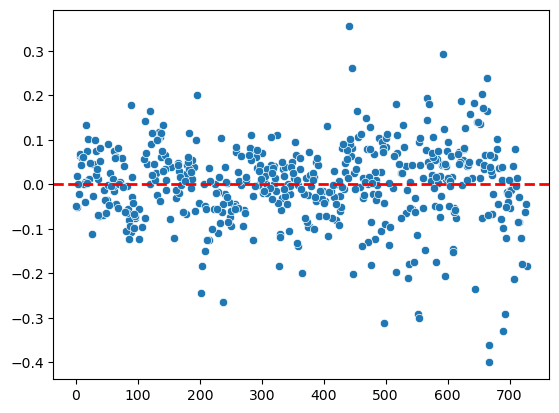

In [44]:
sns.scatterplot(residuals)
plt.axhline(0, color='red', linestyle='dashed', linewidth=2)


<Axes: ylabel='Density'>

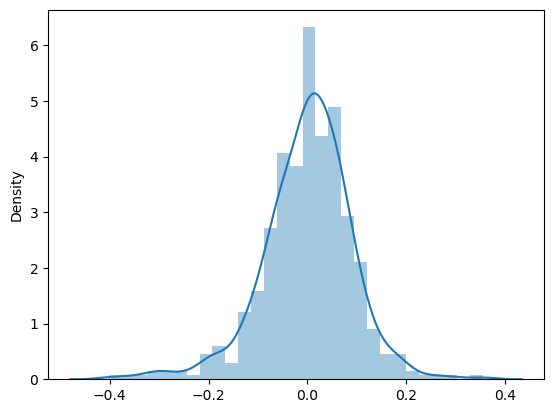

In [47]:
sns.distplot(residuals)

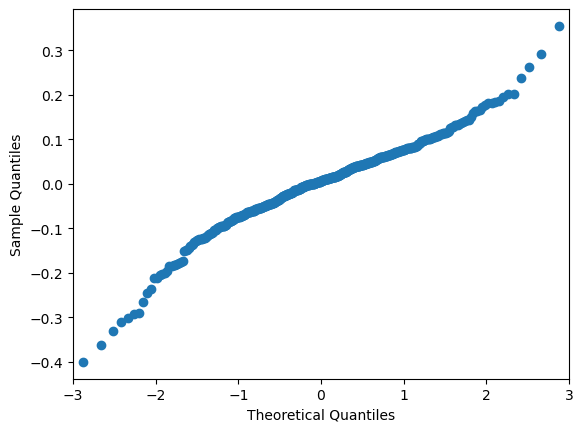

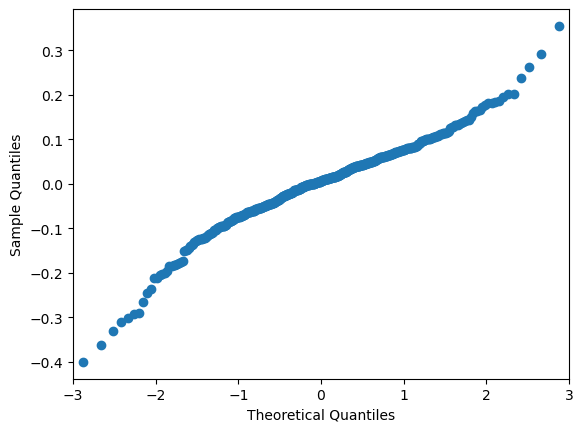

In [48]:
import statsmodels.api as sm

sm.qqplot(residuals)

#### residuals are normally distributed and have mean 0.0. So we are good from residual analysis.

## Lets Start Prediction

In [584]:
num_vars = ['cnt', 'windspeed', 'hum', 'atemp', 'weekday']

bike_rental_data_test[num_vars] = scaler.transform(bike_rental_data_test[num_vars])

bike_rental_data_test.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,LIGHT_PRECIPITATION,MISTY,...,DECEMBER,FEBRUARY,JANUARY,JULY,JUNE,MARCH,MAY,NOVEMBER,OCTOBER,SEPTEMBER
184,0,1,0.166667,0,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,1,0,0,0,0,0,0
535,1,0,0.500000,1,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0.666667,1,0.496145,0.837699,0.334206,0.303382,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,0.500000,1,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0.666667,1,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,0,0,1,0,0,0,0,0


In [585]:
y_bike_rental_data_test = bike_rental_data_test.pop('cnt')
X_bike_rental_data_test = bike_rental_data_test

In [586]:
#ensure columns are same in test data frame as in train data frame
X_bike_rental_data_test = sm.add_constant(X_bike_rental_data_test)

X_bike_rental_data_test = X_bike_rental_data_test[X_bike_rental_data_train_rfe.columns]

In [587]:
Y_bike_rental_data_test_pred = lm.predict(X_bike_rental_data_test)

## Model Evaluation

In [588]:
from sklearn.metrics import r2_score

r2 = r2_score(y_bike_rental_data_test, Y_bike_rental_data_test_pred)
print("R-squared:", r2)

R-squared: 0.8169560871765982


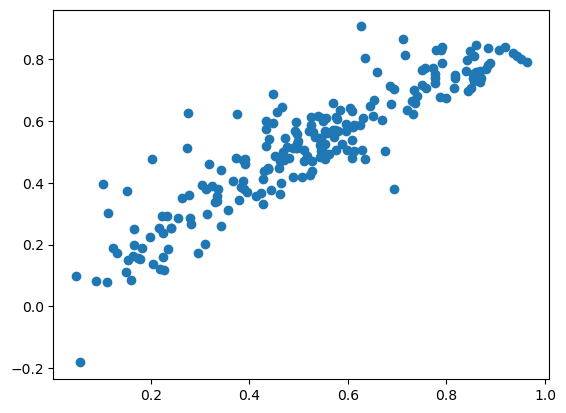

In [589]:
#we have decent r square for test prediction as well.
#lets also draw liner graph as well 
plt.scatter(y_bike_rental_data_test,Y_bike_rental_data_test_pred)

<Axes: xlabel='cnt'>

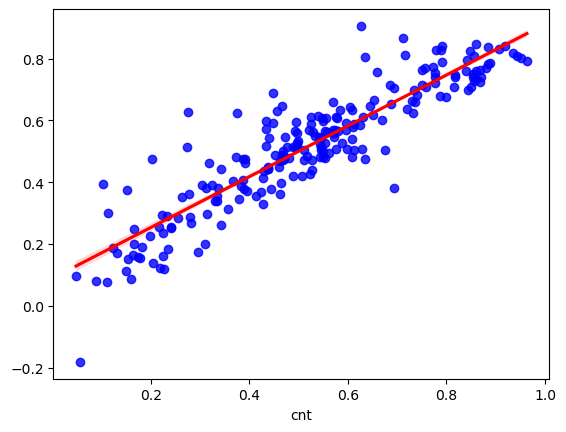

In [590]:
sns.regplot(x=y_bike_rental_data_test, y=Y_bike_rental_data_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})


#### Demand of bikes depend on year, holiday, atemp, humidity, windspeed, LIGHT_PRECIPITATION, Misty, winter, spring, July and Sept